#### Importações e Dados

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib import gridspec
from geopy.geocoders import Nominatim
plt.style.use('dark_background')
import plotly.express as px
# Tornar a notação científica mais agradavel visualmente.
pd.options.display.float_format = '{:.2f}'.format

In [8]:
df = pd.read_csv('superstore.csv', encoding='ANSI')

#### Tratamento

In [9]:
# Nomes alterados para remover os espaços e deixar em minúsculo.
df.columns = ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
 'postal_code', 'region', 'product id', 'category', 'sub_category',
 'product_name', 'sales', 'quantity', 'discount', 'profit']

# remover uma coluna sem utilidade.
df = df.drop('row_id', axis=1)

# converter coluna em formato datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

# criar nova coluna 'lat' & 'lon' para a visualização no mapa
"""
for n in range(len(df)):
    #print(f'loop: {n} / {len(df)}')
    local_info = df.loc[n, ['country', 'state', 'city', 'postal_code' ]].tolist()
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.geocode(local_info)
    if 'lat' in location.raw and 'lon' in location.raw:
        df.loc[n, 'lat'] = location.raw['lat']
        df.loc[n, 'lon'] = location.raw['lon']"""

'\nfor n in range(len(df)):\n    #print(f\'loop: {n} / {len(df)}\')\n    local_info = df.loc[n, [\'country\', \'state\', \'city\', \'postal_code\' ]].tolist()\n    geolocator = Nominatim(user_agent="geoapiExercises")\n    location = geolocator.geocode(local_info)\n    if \'lat\' in location.raw and \'lon\' in location.raw:\n        df.loc[n, \'lat\'] = location.raw[\'lat\']\n        df.loc[n, \'lon\'] = location.raw[\'lon\']'

In [10]:
#for n in range(len(df)):
#    print(f'loop: {n} / {len(df)}')
#    local_info = df.loc[n, ['country', 'state', 'city', 'postal_code' ]].tolist()
#    geolocator = Nominatim(user_agent="geoapiExercises")
#    location = geolocator.geocode(local_info)
#    if 'lat' in location.raw and 'lon' in location.raw:
#        df.loc[n, 'lat'] = location.raw['lat']
#        df.loc[n, 'lon'] = location.raw['lon']
#    else:
#        print(f'Sem dados: linha {n}')

#### Análise

1. Obter a melhor desempenho para os Negócios, e mostrar a visualização dela
2. Mostrar os produtos, regiões, categorias e segmentos de clientes evitar
3. Mostrar os produtos, regiões, categorias e segmentos de clientes melhorar
4. Mostrar recomendações a mais

**Problema**

- Não está havendo uma visualização clara por parte da empresa dos dados gerados

**Entregar**

- Criar dashboard interativos, visualização dos dados e o que está acontecendo, recomendações de negócios, insights acionaveis, etc.

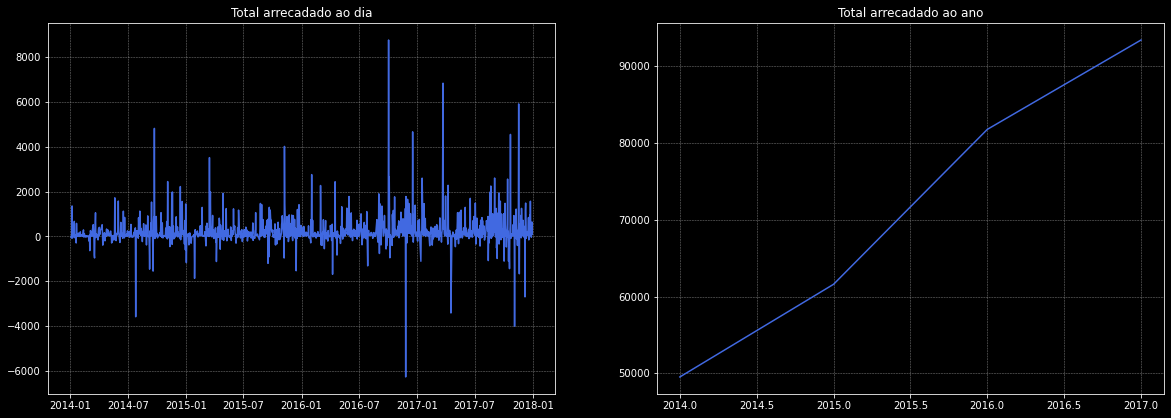

In [14]:
#soma de todos os lucros de produtos vendidos por dia e ano
fig = plt.figure(figsize=(20,15))
specs = gridspec.GridSpec( nrows=2 , ncols=2 , figure=fig )

ax1 = fig.add_subplot( specs[0 , 0] )
ax2 = fig.add_subplot( specs[0 , 1:3] )

ax1.set_title('Total arrecadado ao dia')
ax2.set_title('Total arrecadado ao ano')

ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.5);
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.5);

year_profit = df[['order_date', 'profit']].groupby('order_date').sum().reset_index()
ax1.plot(year_profit['order_date'], year_profit['profit'], color='royalblue');

year_profit['order_date'] = year_profit['order_date'].dt.year
year_profit = year_profit.groupby('order_date').sum().reset_index()
ax2.plot(year_profit['order_date'], year_profit['profit'], color='royalblue');


#5 grandes prejuízos ao longo do tempo, 4 estão mais próximos do momento atual
#houve alguma coisa nessa data
#h1. Ocorreu uma promoção e uma demanda maior de clientes que resultou no prejuízo
#h2. Certo produto está resultando em prejuízo

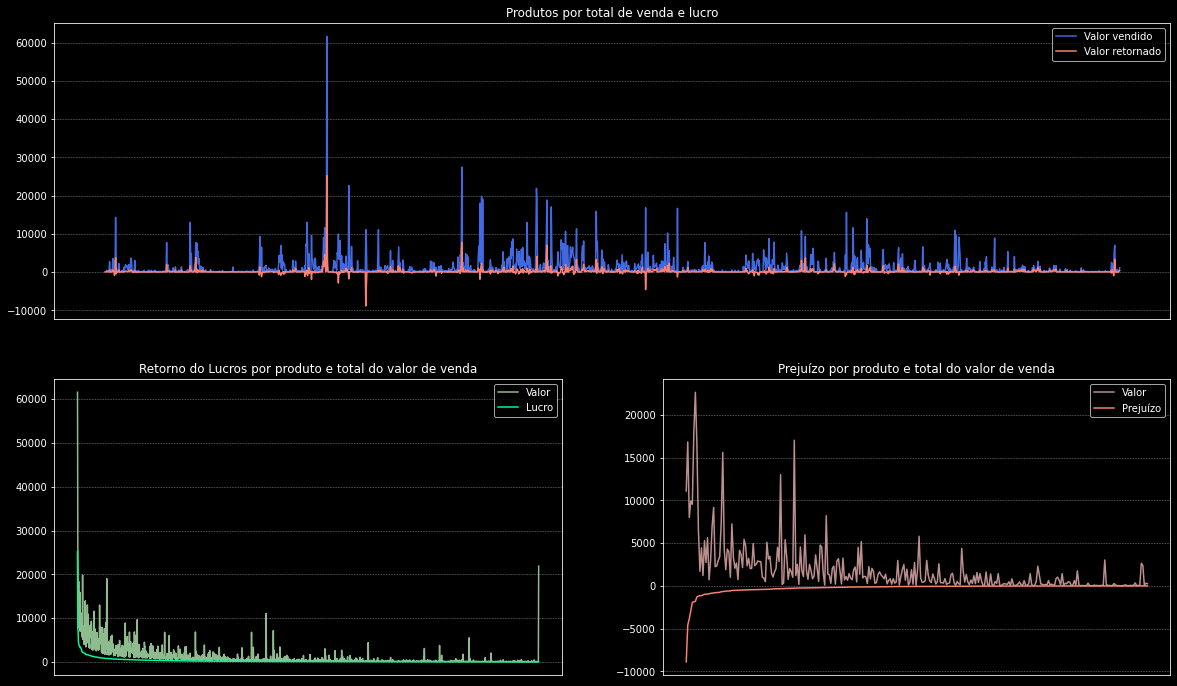

In [15]:
# frequencia relativa
# agrupado por produtos e seu total
prod_sale = df[['product_name', 'sales']].groupby('product_name').sum().reset_index()
prod_prof = df[['product_name', 'profit']].groupby('product_name').sum().reset_index()

# soma de lucro e valor por produtos
profit_all = df[['product_name', 'profit', 'sales']].groupby('product_name').sum().reset_index().sort_values('profit', ascending=True)
profit_pos = profit_all.loc[ profit_all['profit'] > 0 , : ].sort_values('profit', ascending=False)
profit_neg = profit_all.loc[ profit_all['profit'] <= 0 , : ]

fig = plt.figure(figsize=(20,12))
specs = gridspec.GridSpec( nrows=2 , ncols=2 , figure=fig )

ax1 = fig.add_subplot( specs[ 0 , : ] )
ax2 = fig.add_subplot( specs[ 1 , 0 ] )
ax3 = fig.add_subplot( specs[ 1 , 1 ] )

ax1.set_xticks([]), ax1.set_title('Produtos por total de venda e lucro')
ax2.set_xticks([]), ax2.set_title('Retorno do Lucros por produto e total do valor de venda')
ax3.set_xticks([]), ax3.set_title('Prejuízo por produto e total do valor de venda')

ax1.plot( prod_sale['product_name'], prod_sale['sales'], color='royalblue' );
ax1.plot( prod_prof['product_name'], prod_prof['profit'], color='salmon' );
ax1.legend(['Valor vendido','Valor retornado']), ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.5);

ax2.plot( profit_pos['product_name'], profit_pos['sales'], color='darkseagreen', label='Valor' );
ax2.plot( profit_pos['product_name'], profit_pos['profit'], color='mediumspringgreen', label='Lucro' );
ax2.legend(['Valor','Lucro']), ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.5);

ax3.plot( profit_neg['product_name'], profit_neg['sales'], color='rosybrown', label='Valor' );
ax3.plot( profit_neg['product_name'], profit_neg['profit'], color='salmon', label='Prejuízo' );
ax3.legend(['Valor','Prejuízo']), ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.5);
#Certos produtos estão provocando o prejuízo para a loja, eles não estão
#equilibrado para haver um retorno da venda


In [16]:
display('>> Prejuízo', profit_neg, '>> Lucro', profit_pos)

'>> Prejuízo'

,product_name,profit,sales
475,Cubify CubeX 3D Printer Double Head Print,-8879.97,11099.96
985,Lexmark MX611dhe Monochrome Laser Printer,-4589.97,16829.90
476,Cubify CubeX 3D Printer Triple Head Print,-3839.99,7999.98
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2876.12,9917.64
376,Bush Advantage Collection Racetrack Conference...,-1934.40,9544.73
...,...,...,...
1300,Premier Electric Letter Opener,-0.00,2641.61
767,Global Super Steno Chair,-0.00,2389.90
131,"Alliance Big Bands Rubber Bands, 12/Pack",0.00,29.70
269,"Avery Trapezoid Extra Heavy Duty 4"" Binders",0.00,314.55


'>> Lucro'

,product_name,profit,sales
404,Canon imageCLASS 2200 Advanced Copier,25199.93,61599.82
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.04,27453.38
805,Hewlett Packard LaserJet 3310 Copier,6983.88,18839.69
400,Canon PC1060 Personal Laser Copier,4570.93,11619.83
787,HP Designjet T520 Inkjet Large Format Printer ...,4094.98,18374.90
...,...,...,...
867,Hoover Replacement Belt for Commercial Guardsm...,0.44,9.77
1462,Sony 8GB Class 10 Micro SDHC R40 Memory Card,0.34,27.19
981,Letter Slitter,0.30,10.08
283,Bagged Rubber Bands,0.30,25.70


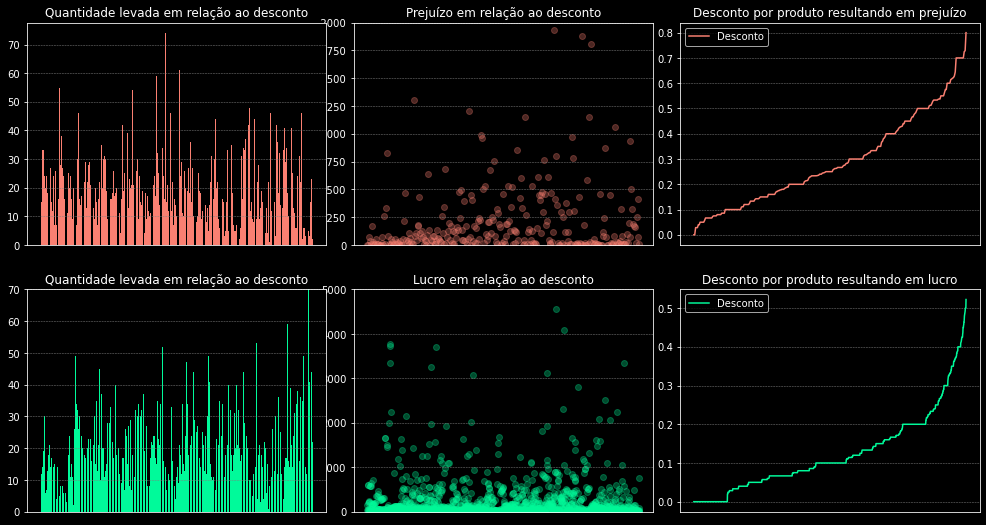

In [17]:
# soma de lucro e valor por produtos
prod_quant = df[['product_name', 'quantity']].groupby('product_name').sum().reset_index()
profit_ct = df[['product_name', 'discount']].groupby('product_name').mean().reset_index().sort_values('discount', ascending=True)
profit_ct.columns = ['product_name', 'discount_mean']
profit_ct_neg = pd.merge(profit_neg, profit_ct, how = 'inner', on = 'product_name').sort_values('discount_mean')
profit_ct_pos = pd.merge(profit_pos, profit_ct, how = 'inner', on = 'product_name').sort_values('discount_mean')
profit_ct_neg = pd.merge(profit_ct_neg, prod_quant, how = 'inner', on = 'product_name')
profit_ct_pos = pd.merge(profit_ct_pos, prod_quant, how = 'inner', on = 'product_name')

fig = plt.figure(figsize=(20,9))
specs = gridspec.GridSpec( nrows=2 , ncols=7 , figure=fig )

ax1 = fig.add_subplot( specs[ 0 , 4:6 ] )
ax2 = fig.add_subplot( specs[ 1 , 4:6 ] )
ax3 = fig.add_subplot( specs[ 0 , 2:4 ] )
ax4 = fig.add_subplot( specs[ 1 , 2:4 ] )
ax5 = fig.add_subplot( specs[ 0 , 0:2 ] )
ax6 = fig.add_subplot( specs[ 1 , 0:2 ] )

ax1.set_xticks([]), ax1.set_title('Desconto por produto resultando em prejuízo')
ax2.set_xticks([]), ax2.set_title('Desconto por produto resultando em lucro')
ax3.set_xticks([]), ax3.set_title('Prejuízo em relação ao desconto')
ax4.set_xticks([]), ax4.set_title('Lucro em relação ao desconto')
ax5.set_xticks([]), ax5.set_title('Quantidade levada em relação ao desconto')
ax6.set_xticks([]), ax6.set_title('Quantidade levada em relação ao desconto')

ax1.plot( profit_ct_neg['product_name'], profit_ct_neg['discount_mean'], color='salmon' );
ax1.legend(['Desconto']), ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.5);

ax2.plot( profit_ct_pos['product_name'], profit_ct_pos['discount_mean'], color='mediumspringgreen', label='Lucro' );
ax2.legend(['Desconto']), ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.5);

ax3.scatter( profit_ct_neg['product_name'], profit_ct_neg['profit'], color='salmon', alpha = 0.3, ), ax3.invert_yaxis()
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.5), ax3.set_ylim([0, -2000]);

ax4.scatter( profit_ct_pos['product_name'], profit_ct_pos['profit'], color='mediumspringgreen', label='Lucro', alpha = 0.3 );
ax4.grid(color = 'grey', linestyle = '--', linewidth = 0.5), ax4.set_ylim([0, 5000]);

ax5.bar( profit_ct_neg['product_name'], profit_ct_neg['quantity'], color='salmon' );
ax5.grid(color = 'grey', linestyle = '--', linewidth = 0.5);

ax6.bar( profit_ct_pos['product_name'], profit_ct_pos['quantity'], color='mediumspringgreen' );
ax6.grid(color = 'grey', linestyle = '--', linewidth = 0.5), ax6.set_ylim([0, 70]);

In [18]:
display('>> Produtos resultando em prejuzo', profit_ct_neg.sort_values('profit'), 
        '>> Produtos resultando em Lucro', profit_ct_pos.sort_values('profit', ascending=False))

# Produtos com descontos abaixo de 50% tem tendencia a retornarem lucro
# em relação a quantidade levada for menor entre 20 e 10
# Produtos levados em grande quantidade, maior que 20
# e seu desconto for superior a 25%, retornaram grandes prjuízos

'>> Produtos resultando em prejuzo'

,product_name,profit,sales,discount_mean,quantity
269,Cubify CubeX 3D Printer Double Head Print,-8879.97,11099.96,0.53,9
214,Lexmark MX611dhe Monochrome Laser Printer,-4589.97,16829.90,0.40,18
251,Cubify CubeX 3D Printer Triple Head Print,-3839.99,7999.98,0.50,4
169,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2876.12,9917.64,0.28,27
208,Bush Advantage Collection Racetrack Conference...,-1934.40,9544.73,0.35,33
...,...,...,...,...,...
25,Premier Electric Letter Opener,-0.00,2641.61,0.08,24
70,Global Super Steno Chair,-0.00,2389.90,0.14,30
235,"Avery Trapezoid Extra Heavy Duty 4"" Binders",0.00,314.55,0.45,15
1,"Alliance Big Bands Rubber Bands, 12/Pack",0.00,29.70,0.00,15


'>> Produtos resultando em Lucro'

,product_name,profit,sales,discount_mean,quantity
921,Canon imageCLASS 2200 Advanced Copier,25199.93,61599.82,0.12,20
1366,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.04,27453.38,0.24,31
1208,Hewlett Packard LaserJet 3310 Copier,6983.88,18839.69,0.20,38
1073,Canon PC1060 Personal Laser Copier,4570.93,11619.83,0.15,19
1116,HP Designjet T520 Inkjet Large Format Printer ...,4094.98,18374.90,0.17,12
...,...,...,...,...,...
1423,Hoover Replacement Belt for Commercial Guardsm...,0.44,9.77,0.30,6
1205,Sony 8GB Class 10 Micro SDHC R40 Memory Card,0.34,27.19,0.20,3
261,Bagged Rubber Bands,0.30,25.70,0.04,21
123,Letter Slitter,0.30,10.08,0.00,4


In [19]:
# identificar quais cliêntes gastam mais e seu retorno
customer_sales = df[['customer_id', 'customer_name', 'sales']].groupby(['customer_id', 'customer_name']).sum().reset_index()
customer_data = df[['customer_id', 'order_date']].groupby('customer_id').count().reset_index()
customer_sldt = pd.merge(customer_sales, customer_data, how = 'inner', on = 'customer_id').sort_values('sales', ascending=False).reset_index(drop=True)
customer_sldt.columns = ['customer_id', 'nome', 'total_gasto', 'visitas' ]
display(customer_sldt, customer_sldt.sort_values('visitas', ascending=False))

,customer_id,nome,total_gasto,visitas
0,SM-20320,Sean Miller,25043.05,15
1,TC-20980,Tamara Chand,19052.22,12
2,RB-19360,Raymond Buch,15117.34,18
3,TA-21385,Tom Ashbrook,14595.62,10
4,AB-10105,Adrian Barton,14473.57,20
...,...,...,...,...
788,RS-19870,Roy Skaria,22.33,3
789,MG-18205,Mitch Gastineau,16.74,2
790,CJ-11875,Carl Jackson,16.52,1
791,LD-16855,Lela Donovan,5.30,1


,customer_id,nome,total_gasto,visitas
73,WB-21850,William Brown,6160.10,37
157,MA-17560,Matt Abelman,4299.16,34
51,PP-18955,Paul Prost,7252.61,34
20,JL-15835,John Lee,9799.92,34
13,SV-20365,Seth Vernon,11470.95,32
...,...,...,...,...
786,RE-19405,Ricardo Emerson,48.36,1
658,JR-15700,Jocasta Rupert,863.88,1
790,CJ-11875,Carl Jackson,16.52,1
791,LD-16855,Lela Donovan,5.30,1


In [20]:
# tabela com dados do segmento 'home office' order_date
work_prof = df.loc[ df['segment'] == 'Corporate', ['customer_id', 'customer_name', 'sales', 'profit', 'quantity']].groupby(['customer_id', 'customer_name']).sum().reset_index()
work_disc = df.loc[ df['segment'] == 'Corporate', ['customer_id', 'discount']].groupby('customer_id').mean().reset_index()
work_disc.columns = ['customer_id', 'discount_mean']
worker = pd.merge(work_prof, work_disc, how = 'inner', on = 'customer_id').sort_values('discount_mean')

# tabela com dados do segmento 'corporate'
home_prof = df.loc[ df['segment'] == 'Home Office', ['customer_id', 'customer_name', 'sales', 'profit', 'quantity']].groupby(['customer_id', 'customer_name']).sum().reset_index()
home_disc = df.loc[ df['segment'] == 'Home Office', ['customer_id', 'discount']].groupby('customer_id').mean().reset_index()
home_disc.columns = ['customer_id', 'discount_mean']
home = pd.merge(home_prof, home_disc, how = 'inner', on = 'customer_id').sort_values('discount_mean')

# tabela com dados do segmento 'consumer'
custo_prof = df.loc[ df['segment'] == 'Consumer', ['customer_id', 'customer_name','sales', 'profit', 'quantity']].groupby(['customer_id', 'customer_name']).sum().reset_index()
custo_disc = df.loc[ df['segment'] == 'Consumer', ['customer_id', 'discount']].groupby('customer_id').mean().reset_index()
custo_disc.columns = ['customer_id', 'discount_mean']
customer = pd.merge(custo_prof, custo_disc, how = 'inner', on = 'customer_id').sort_values('discount_mean')
# home
# worker
# customer

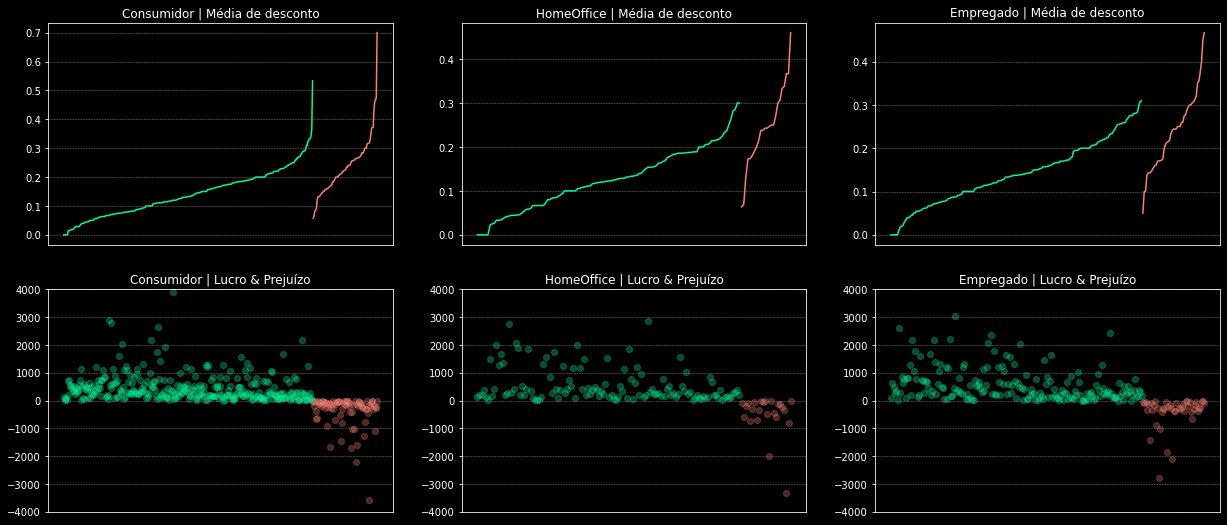

In [21]:
fig = plt.figure(figsize=(21,9))
specs = gridspec.GridSpec( nrows=2, ncols=3, figure=fig )

ax1 = fig.add_subplot( specs[ 0 , 0 ] )
ax2 = fig.add_subplot( specs[ 1 , 0 ] )
ax3 = fig.add_subplot( specs[ 0 , 1 ] )
ax4 = fig.add_subplot( specs[ 1 , 1 ] )
ax5 = fig.add_subplot( specs[ 0 , 2 ] )
ax6 = fig.add_subplot( specs[ 1 , 2 ] )

ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax4.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax5.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax6.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

ax1.set_xticks([]), ax1.set_title('Consumidor | Média de desconto')
ax2.set_xticks([]), ax2.set_title('Consumidor | Lucro & Prejuízo')
ax3.set_xticks([]), ax3.set_title('HomeOffice | Média de desconto')
ax4.set_xticks([]), ax4.set_title('HomeOffice | Lucro & Prejuízo')
ax5.set_xticks([]), ax5.set_title('Empregado | Média de desconto')
ax6.set_xticks([]), ax6.set_title('Empregado | Lucro & Prejuízo');

ax1.plot( customer.loc[ customer['profit'] > 0, 'customer_id'], customer.loc[ customer['profit'] > 0, 'discount_mean'], color='mediumspringgreen' )
ax1.plot( customer.loc[ customer['profit'] <= 0, 'customer_id'], customer.loc[ customer['profit'] <= 0, 'discount_mean'], color='salmon' )

ax2.scatter( customer.loc[ customer['profit'] > 0, 'customer_id'], customer.loc[ customer['profit'] > 0, 'profit'], color='mediumspringgreen', alpha = 0.3 )
ax2.scatter( customer.loc[ customer['profit'] <= 0, 'customer_id'], customer.loc[ customer['profit'] <= 0, 'profit'], color='salmon', alpha = 0.3 ), ax2.set_ylim([-4000, 4000])

ax3.plot( home.loc[ home['profit'] > 0, 'customer_id'], home.loc[ home['profit'] > 0, 'discount_mean'], color='mediumspringgreen' )
ax3.plot( home.loc[ home['profit'] <= 0, 'customer_id'], home.loc[ home['profit'] <= 0, 'discount_mean'], color='salmon' )

ax4.scatter( home.loc[ home['profit'] > 0, 'customer_id'], home.loc[ home['profit'] > 0, 'profit'], color='mediumspringgreen', alpha = 0.3 )
ax4.scatter( home.loc[ home['profit'] <= 0, 'customer_id'], home.loc[ home['profit'] <= 0, 'profit'], color='salmon', alpha = 0.3 ), ax4.set_ylim([-4000, 4000])

ax5.plot( worker.loc[ worker['profit'] > 0, 'customer_id'], worker.loc[ worker['profit'] > 0, 'discount_mean'], color='mediumspringgreen' )
ax5.plot( worker.loc[ worker['profit'] <= 0, 'customer_id'], worker.loc[ worker['profit'] <= 0, 'discount_mean'], color='salmon' )

ax6.scatter( worker.loc[ worker['profit'] > 0, 'customer_id'], worker.loc[ worker['profit'] > 0, 'profit'], color='mediumspringgreen', alpha = 0.3 )
ax6.scatter( worker.loc[ worker['profit'] <= 0, 'customer_id'], worker.loc[ worker['profit'] <= 0, 'profit'], color='salmon', alpha = 0.3 ), ax6.set_ylim([-4000, 4000]);

Text(0.5, 1.0, 'Total gasto por segmento')

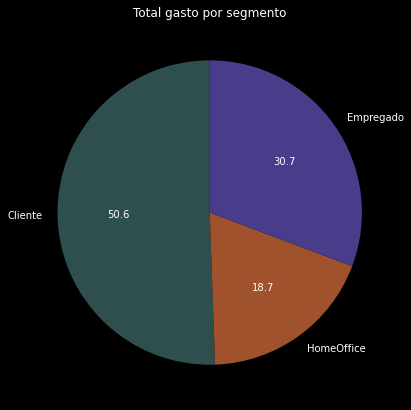

In [35]:
custo_date = df.loc[ df['segment'] == 'Consumer', ['customer_id', 'sales', 'order_date']].sort_values('order_date')
home_date = df.loc[ df['segment'] == 'Home Office', ['customer_id', 'sales', 'order_date']].sort_values('order_date')
work_date = df.loc[ df['segment'] == 'Corporate', ['customer_id', 'sales', 'order_date']].sort_values('order_date')

labels = ['Cliente', 'HomeOffice', 'Empregado']
size = [customer['sales'].sum(), home['sales'].sum(), worker['sales'].sum()]

fig = plt.figure(figsize=(7,7))
specs = gridspec.GridSpec(nrows=1, ncols=1, figure=fig)

ax1 = fig.add_subplot( specs[ 0 , 0] )
ax1.pie(size, labels=labels, autopct='%1.1f', shadow=False, startangle=90, colors=['darkslategrey', 'sienna', 'darkslateblue']);
ax1.set_title('Total gasto por segmento')


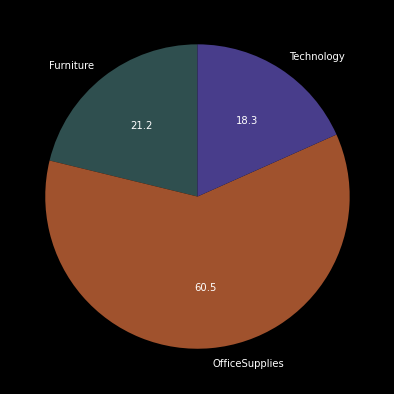

In [58]:
categ = df[['category', 'sales', 'profit', 'quantity']].groupby('category').sum().reset_index()
fig = plt.figure(figsize=(7,7))

labels = ['Furniture', 'OfficeSupplies', 'Technology']
size = [categ.loc[0, 'quantity'], categ.loc[1, 'quantity'], categ.loc[2, 'quantity']]
plt.pie(size, labels=labels, autopct='%1.1f', shadow=False, startangle=90, colors=['darkslategrey', 'sienna', 'darkslateblue']);


In [54]:
categ

,category,sales,profit,quantity
0,Furniture,741999.80,18451.27,8028
1,Office Supplies,719047.03,122490.80,22906
2,Technology,836154.03,145454.95,6939


In [37]:
#produtos que são vendidos po certos meses
df.sort_values('order_date')['order_date', 'product_name']

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product id,category,sub_category,product_name,sales,quantity,discount,profit
7980,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2,0.20,5.55
739,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.78,3,0.20,4.27
740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,3,0.20,-64.77
741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2,0.80,-5.49
1759,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,3,0.20,4.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.02,3,0.20,-0.60
908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.78,3,0.20,19.79
907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.93,7,0.00,2.73
1296,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90,2,0.20,4.52
